In [2]:
import matplotlib.pylab as plt
import pandas as pd
import sys
import numpy as np
import sklearn
import scipy
import matplotlib
import seaborn as sns
data_root = "https://raw.githubusercontent.com/mattressdog/data/refs/heads/main/"

In [3]:
df = pd.read_csv(data_root + "Breast_Cancer_Primary.csv",
                 dtype={"Race": "string",
                        "Marital Status": "string",
                        "T Stage": "string",
                        "N Stage": "string",
                        "6th Stage": "string",
                        "differentiate": "string",
                        #"Grade": "int64",
                        "A Stage": "string",
                        #"ride_id": "string",
                        "Status": "string",})
df.columns = df.columns.str.strip()

Separating age 45yo and younger, 46yo and older

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   string
 2   Marital Status          4024 non-null   string
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   string
 5   6th Stage               4024 non-null   string
 6   differentiate           4024 non-null   string
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   string
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df_over_45 = df[df["Age"] > 45]
df_under_45 = df[df["Age"] <= 45]

<Axes: xlabel='Tumor Size', ylabel='Count'>

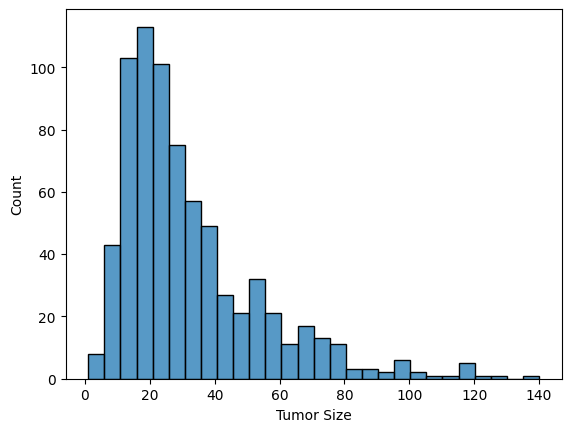

In [6]:
sns.histplot(df_under_45["Tumor Size"])

<Axes: xlabel='Tumor Size', ylabel='Count'>

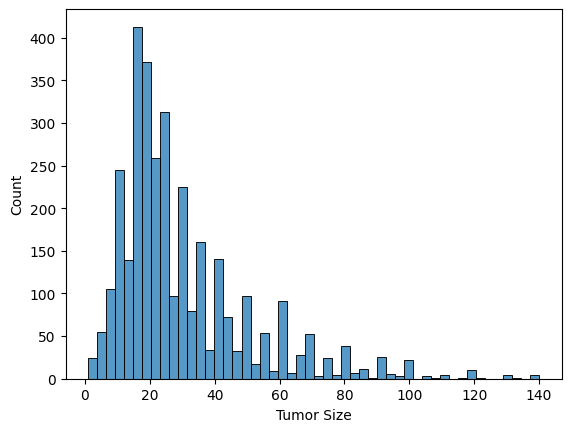

In [7]:
sns.histplot(df_over_45["Tumor Size"])

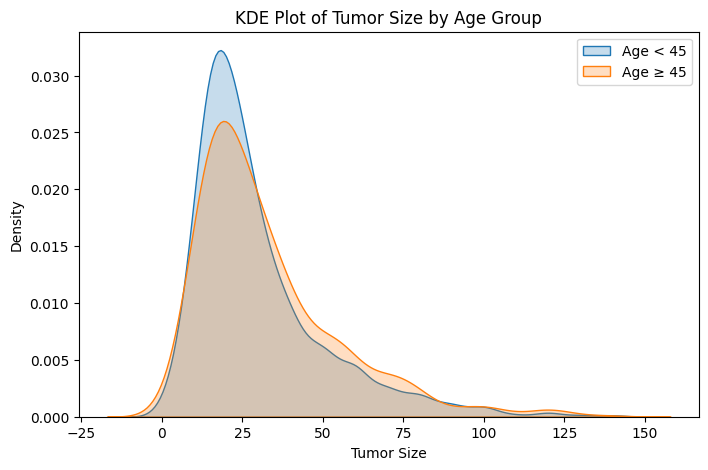

In [8]:
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df_over_45["Tumor Size"],
    label="Age < 45",
    fill=True
)

sns.kdeplot(
    data=df_under_45["Tumor Size"],
    label="Age ≥ 45",
    fill=True
)

plt.title("KDE Plot of Tumor Size by Age Group")
plt.xlabel("Tumor Size")
plt.ylabel("Density")
plt.legend()
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   string
 2   Marital Status          4024 non-null   string
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   string
 5   6th Stage               4024 non-null   string
 6   differentiate           4024 non-null   string
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   string
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [10]:
#num_cols = df.select_dtypes(include=["number"]).columns

#fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 4 * len(num_cols)))

#for ax, col in zip(axes, num_cols):
#    sns.kdeplot(data=df[col], fill=True, ax=ax)
#    ax.set_title(f"KDE of {col}")
#    ax.set_xlabel(col)

#plt.tight_layout()
#plt.show()

<Axes: xlabel='Status', ylabel='Count'>

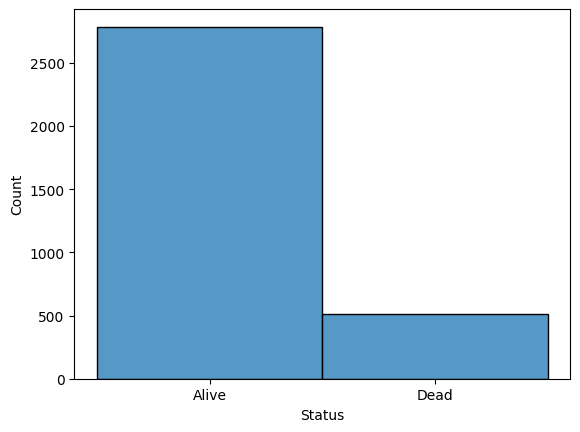

In [11]:
sns.histplot(df_over_45["Status"])

<Axes: xlabel='Status', ylabel='Count'>

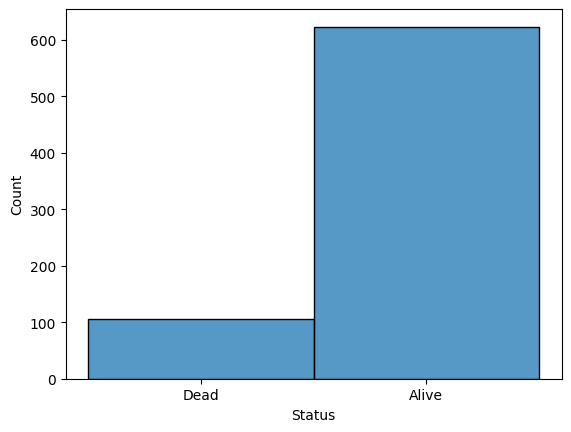

In [12]:
sns.histplot(df_under_45["Status"])

<Axes: xlabel='count', ylabel='Count'>

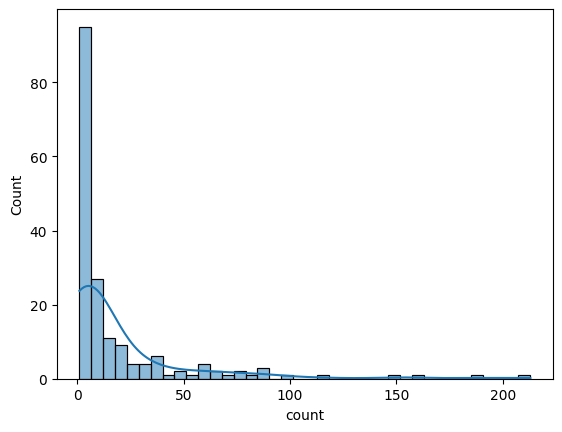

In [13]:
life = df_over_45.groupby('Status')['Tumor Size'].value_counts()
sns.histplot(life, kde=True)


In [14]:
df['N Stage'].value_counts()

,count
N Stage,
N1,2732
N2,820
N3,472


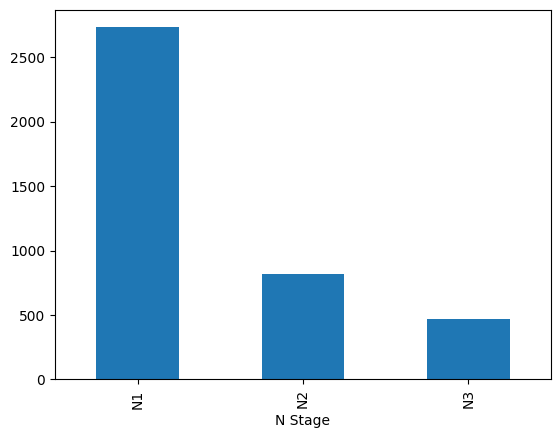

In [15]:
barchart = df['N Stage'].value_counts().plot(kind='bar')

In [16]:
#sns.histplot(N1_over_45["Status"])
#sns.histplot(N2_over_45["Status"])
#sns.histplot(N3_over_45["Status"])
#sns.histplot(N1_under_45["Status"])
#sns.histplot(N2_under_45["Status"])
#sns.histplot(N3_under_45["Status"])

<Axes: xlabel='N Stage', ylabel='Tumor Size'>

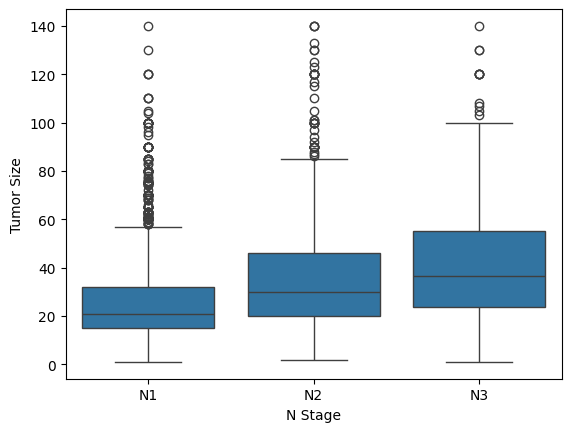

In [17]:
sns.boxplot(x="N Stage", y="Tumor Size", data=df)

In [18]:
#sns.barplot(N1_over_45["Status"])
#sns.barplot(N2_over_45["Status"])
#sns.barplot(N3_over_45["Status"])

In [19]:
#(N3_over_45['Status']
#   .value_counts(normalize=True)
#   .plot(kind='bar'))

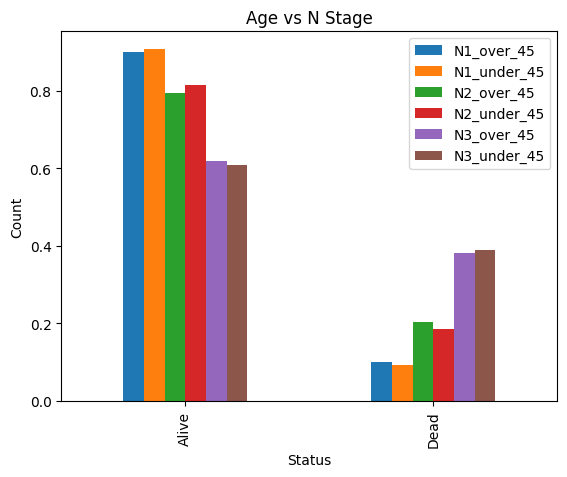

In [32]:
N1_over_45 = df_over_45[(df_over_45['N Stage'] == 'N1')]
N2_over_45 = df_over_45[(df_over_45['N Stage'] == 'N2')]
N3_over_45 = df_over_45[(df_over_45['N Stage'] == 'N3')]
N1_under_45 = df_under_45[(df_under_45['N Stage'] == 'N1')]
N2_under_45 = df_under_45[(df_under_45['N Stage'] == 'N2')]
N3_under_45 = df_under_45[(df_under_45['N Stage'] == 'N3')]

s1 = N1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = N2_over_45['Status'].value_counts(normalize=True).sort_index()
s5 = N3_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = N1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = N2_under_45['Status'].value_counts(normalize=True).sort_index()
s6 = N3_under_45['Status'].value_counts(normalize=True).sort_index()


combined_N = pd.DataFrame({'N1_over_45': s1, 'N1_under_45': s2, 'N2_over_45': s3, 'N2_under_45': s4, 'N3_over_45': s5, 'N3_under_45': s6})
combined_N.plot(kind='bar')
plt.title("Age vs N Stage")
plt.ylabel("Count")
plt.show()

In [21]:
df['T Stage'].value_counts()

,count
T Stage,
T2,1786
T1,1603
T3,533
T4,102


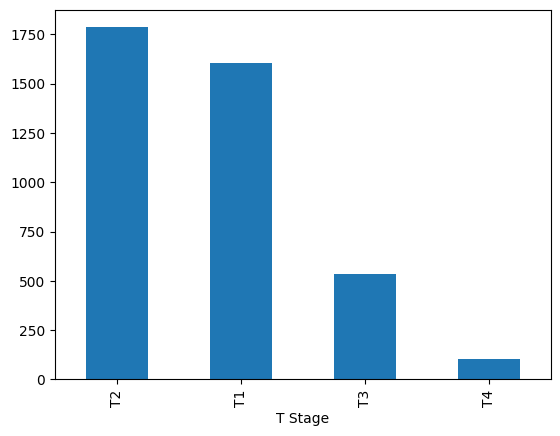

In [22]:
barchart = df['T Stage'].value_counts().plot(kind='bar')

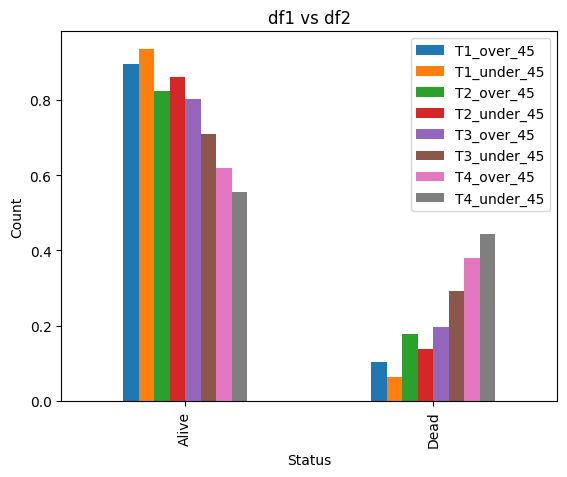

In [31]:
T1_over_45 = df_over_45[(df_over_45['T Stage'] == 'T1')]
T2_over_45 = df_over_45[(df_over_45['T Stage'] == 'T2')]
T3_over_45 = df_over_45[(df_over_45['T Stage'] == 'T3')]
T4_over_45 = df_over_45[(df_over_45['T Stage'] == 'T4')]
T1_under_45 = df_under_45[(df_under_45['T Stage'] == 'T1')]
T2_under_45 = df_under_45[(df_under_45['T Stage'] == 'T2')]
T3_under_45 = df_under_45[(df_under_45['T Stage'] == 'T3')]
T4_under_45 = df_under_45[(df_under_45['T Stage'] == 'T4')]

s1 = T1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = T2_over_45['Status'].value_counts(normalize=True).sort_index()
s5 = T3_over_45['Status'].value_counts(normalize=True).sort_index()
s7 = T4_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = T1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = T2_under_45['Status'].value_counts(normalize=True).sort_index()
s6 = T3_under_45['Status'].value_counts(normalize=True).sort_index()
s8 = T4_under_45['Status'].value_counts(normalize=True).sort_index()



combined_T = pd.DataFrame({'T1_over_45': s1, 'T1_under_45': s2, 'T2_over_45': s3, 'T2_under_45': s4, 'T3_over_45': s5, 'T3_under_45': s6, 'T4_over_45': s7, 'T4_under_45': s8})
combined_T.plot(kind='bar')
plt.title("df1 vs df2")
plt.ylabel("Count")
plt.show()

In [24]:
df['A Stage'].value_counts()

,count
A Stage,
Regional,3932
Distant,92


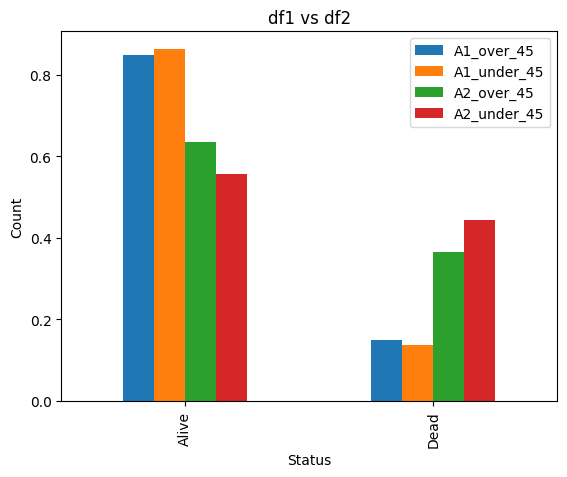

In [30]:
A1_over_45 = df_over_45[(df_over_45['A Stage'] == 'Regional')]
A2_over_45 = df_over_45[(df_over_45['A Stage'] == 'Distant')]
A1_under_45 = df_under_45[(df_under_45['A Stage'] == 'Regional')]
A2_under_45 = df_under_45[(df_under_45['A Stage'] == 'Distant')]

s1 = A1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = A2_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = A1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = A2_under_45['Status'].value_counts(normalize=True).sort_index()

combined_A = pd.DataFrame({'A1_over_45': s1, 'A1_under_45': s2, 'A2_over_45': s3, 'A2_under_45': s4})
combined_A.plot(kind='bar')
plt.title("df1 vs df2")
plt.ylabel("Count")
plt.show()

In [26]:
df['6th Stage'].value_counts()

,count
6th Stage,
IIA,1305
IIB,1130
IIIA,1050
IIIC,472
IIIB,67


<Figure size 1200x1200 with 0 Axes>

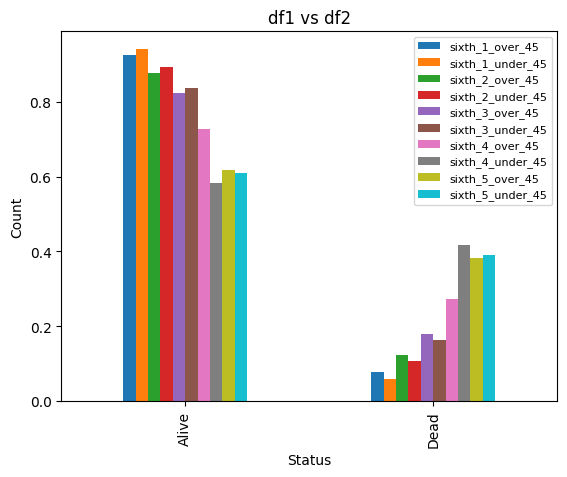

In [29]:
sixth_1_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIA')]
sixth_2_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIB')]
sixth_3_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIIA')]
sixth_4_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIIB')]
sixth_5_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIIC')]
sixth_1_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIA')]
sixth_2_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIB')]
sixth_3_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIIA')]
sixth_4_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIIB')]
sixth_5_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIIC')]

s1 = sixth_1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = sixth_2_over_45['Status'].value_counts(normalize=True).sort_index()
s5 = sixth_3_over_45['Status'].value_counts(normalize=True).sort_index()
s7 = sixth_4_over_45['Status'].value_counts(normalize=True).sort_index()
s9 = sixth_5_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = sixth_1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = sixth_2_under_45['Status'].value_counts(normalize=True).sort_index()
s6 = sixth_3_under_45['Status'].value_counts(normalize=True).sort_index()
s8 = sixth_4_under_45['Status'].value_counts(normalize=True).sort_index()
s10 = sixth_5_under_45['Status'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(12, 12))
combined_sixth = pd.DataFrame({'sixth_1_over_45': s1, 'sixth_1_under_45': s2, 'sixth_2_over_45': s3, 'sixth_2_under_45': s4, 'sixth_3_over_45': s5, 'sixth_3_under_45': s6, 'sixth_4_over_45': s7, 'sixth_4_under_45': s8, 'sixth_5_over_45': s9, 'sixth_5_under_45': s10})
combined_sixth.plot(kind='bar')
#plt.figure(figsize=(10, 6))
plt.legend(fontsize=8)
plt.title("df1 vs df2")
plt.ylabel("Count")
plt.show()



<Figure size 1200x1200 with 0 Axes>

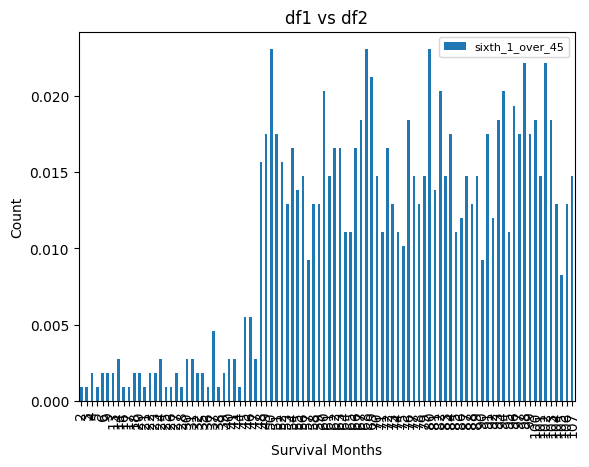

In [28]:
m1 = sixth_1_over_45['Survival Months'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(12, 12))
combined = pd.DataFrame({'sixth_1_over_45': m1})
combined.plot(kind='bar')
#plt.figure(figsize=(10, 6))
plt.legend(fontsize=8)
plt.title("df1 vs df2")
plt.ylabel("Count")
plt.show()

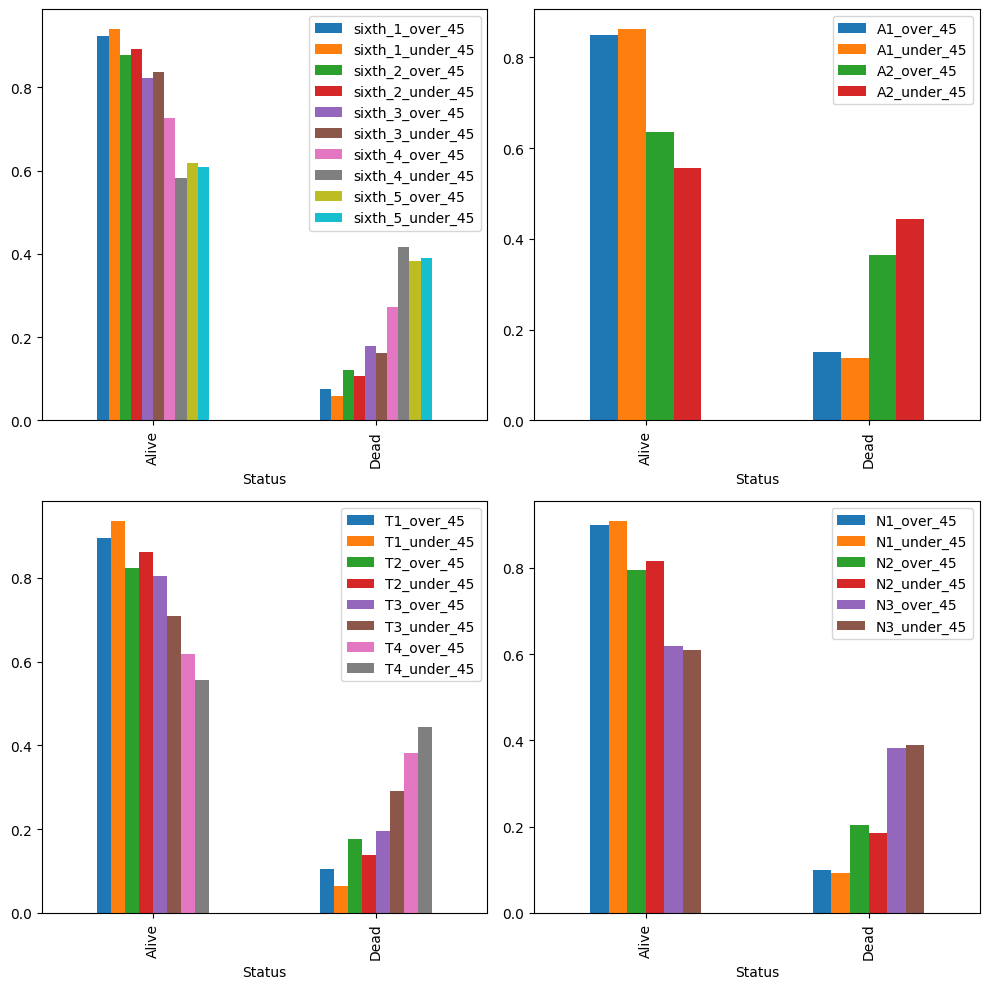

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten axes for easier looping
axs = axes.flatten()

# Your existing bar chart objects / Series
plots = [combined_sixth, combined_A, combined_T, combined_N]

for ax, dframes in zip(axs, plots):
    dframes.plot(kind='bar', ax=ax)
    #ax.set_title(series.name)     # optional: use the Series name
    #ax.set_xlabel("")             # optional: remove x-label clutter
    #ax.set_ylabel("")             # optional: remove y-label clutter

plt.tight_layout()
plt.show()